<a href="https://colab.research.google.com/github/Sahil2004/cs-practicals/blob/main/6th%20sem/%5B01%5D%20Data%20Mining%20and%20Analysis/%5B15%5D%20Practical%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
dataset = pd.read_csv("/content/CO22358_F1.csv")
X = dataset.iloc[:, [1, 2]].values

In [41]:
dataset.head()

,Avg_Lap_Time,Pit_Stop_Duration,Team_Budget_Million,Tire_Age_Laps,Driver_Experience_Years,Is_Fast_Pit,Team,Tire_Type
0,82.483571,3.963089,191.980663,19,3,0,McLaren,Medium
1,79.308678,4.454708,177.739010,17,6,0,Alpine,Soft
2,83.238443,2.800716,151.788911,14,12,1,Ferrari,Medium
3,87.615149,3.781485,130.591897,19,2,0,Alpine,Soft
4,78.829233,3.174679,170.946699,22,8,0,Alpine,Hard


In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
X = imputer.fit_transform(X)

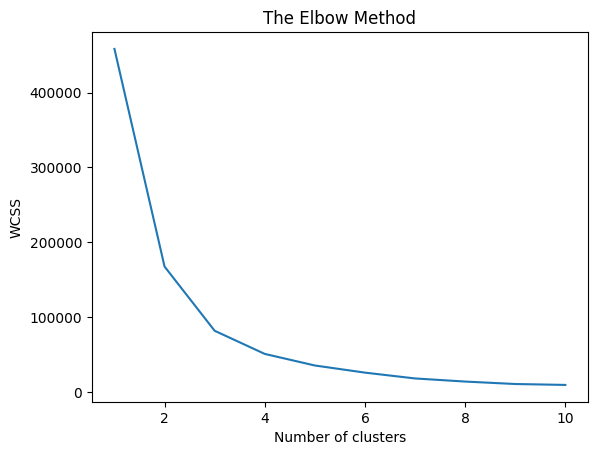

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

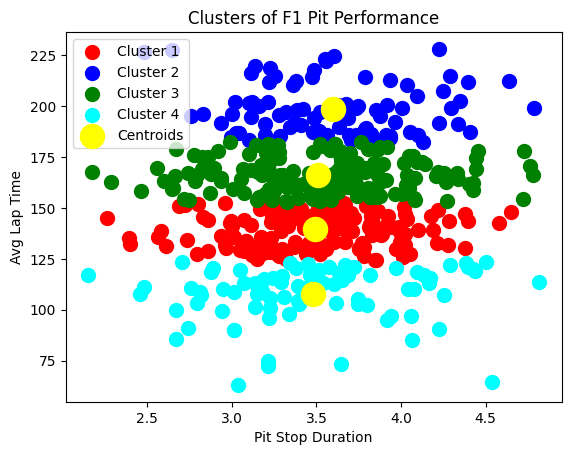

In [46]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of F1 Pit Performance')
plt.ylabel('Avg Lap Time')
plt.xlabel('Pit Stop Duration')
plt.legend()
plt.show()